**Plan**

**1. Principles of autoencoders**<br>
**2. Variational Autoencoders (VAEs)**<br>
**3. Dimensionality reduction and feature learning (machine learning course)**<br>
**4. Applications**<br>
**5. Conclusion**

# **Principles of autoencoders**

**<h2>Definition and Purpose of Autoencoders</h2>**

Autoencoders are neural network architectures designed for unsupervised learning of efficient data codings. They aim to learn a compressed representation (encoding) of input data in an unsupervised manner.

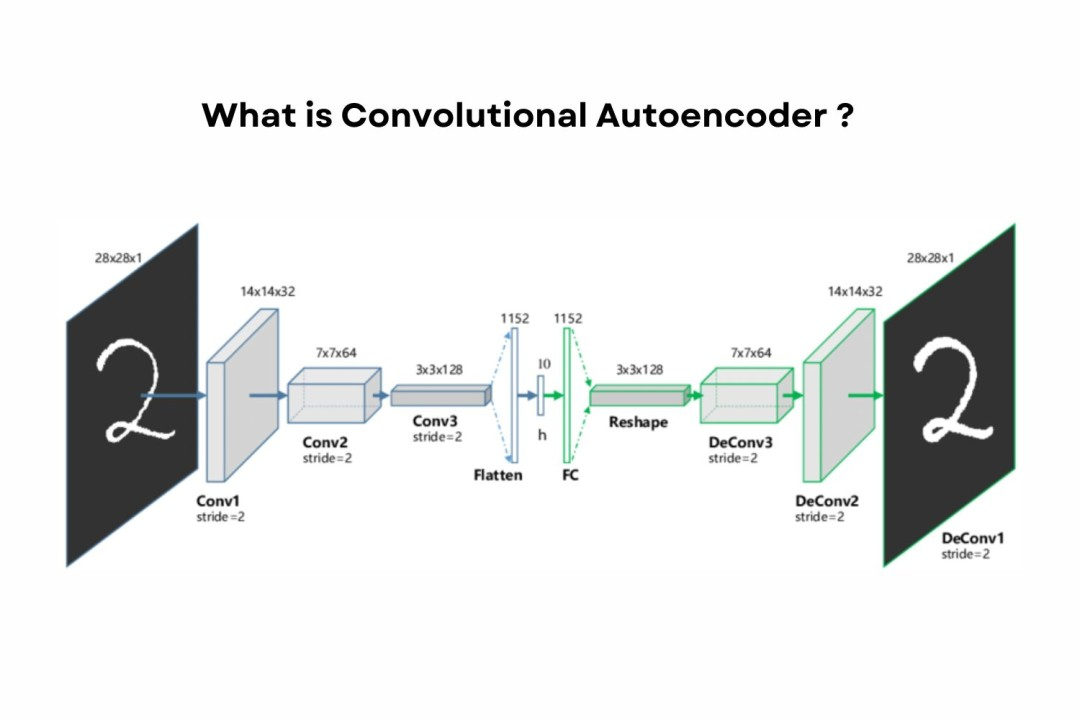

**<h2>Components of Autoencoders</h2>**

* **Encoder:** This part of the autoencoder network compresses the input data into a latent-space representation. It typically consists of several layers (often fully connected or convolutional) that gradually reduce the dimensions of the input.
* **Decoder:** The decoder reconstructs the input data from the latent representation generated by the encoder. It mirrors the encoder's architecture but in reverse, gradually expanding the dimensions back to match the original input size.
* **Latent Space Representation:** The latent space is the compressed representation of the input data learned by the autoencoder. It captures essential features or patterns from the input data.

---

**<h2>Types of Autoencoders</h2>**

* **Basic Autoencoders**<br>
Basic autoencoders consist of a simple architecture with fully connected layers in both the encoder and decoder. They learn a compressed representation of the input data without any additional constraints.

* **Sparse Autoencoders**<br>
Sparse autoencoders introduce sparsity constraints on the latent representation during training. This encourages the autoencoder to learn sparse representations where only a small number of latent variables are activated for any given input.

* **Denoising Autoencoders**<br>
Denoising autoencoders are trained to reconstruct clean input data from noisy versions of the input. They help in learning robust features by forcing the autoencoder to remove noise and retain essential information during reconstruction.

* **Contractive Autoencoders**<br>
Contractive autoencoders incorporate a penalty term in the loss function that penalizes the gradient of the encoder's output with respect to the input. This regularization helps in learning a stable and smooth mapping from the input to the latent space.

---

**<h2>Practical Applications</h2>**

* Autoencoders are widely used in various applications such as dimensionality reduction, feature learning, anomaly detection, and data denoising.
* Understanding these principles and types of autoencoders provides a solid foundation for leveraging their capabilities in practical machine learning tasks and deep learning applications.

# **Variational Autoencoders (VAEs)**

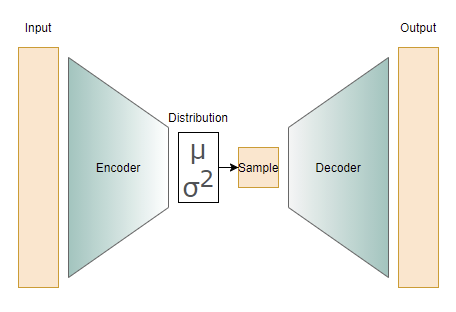

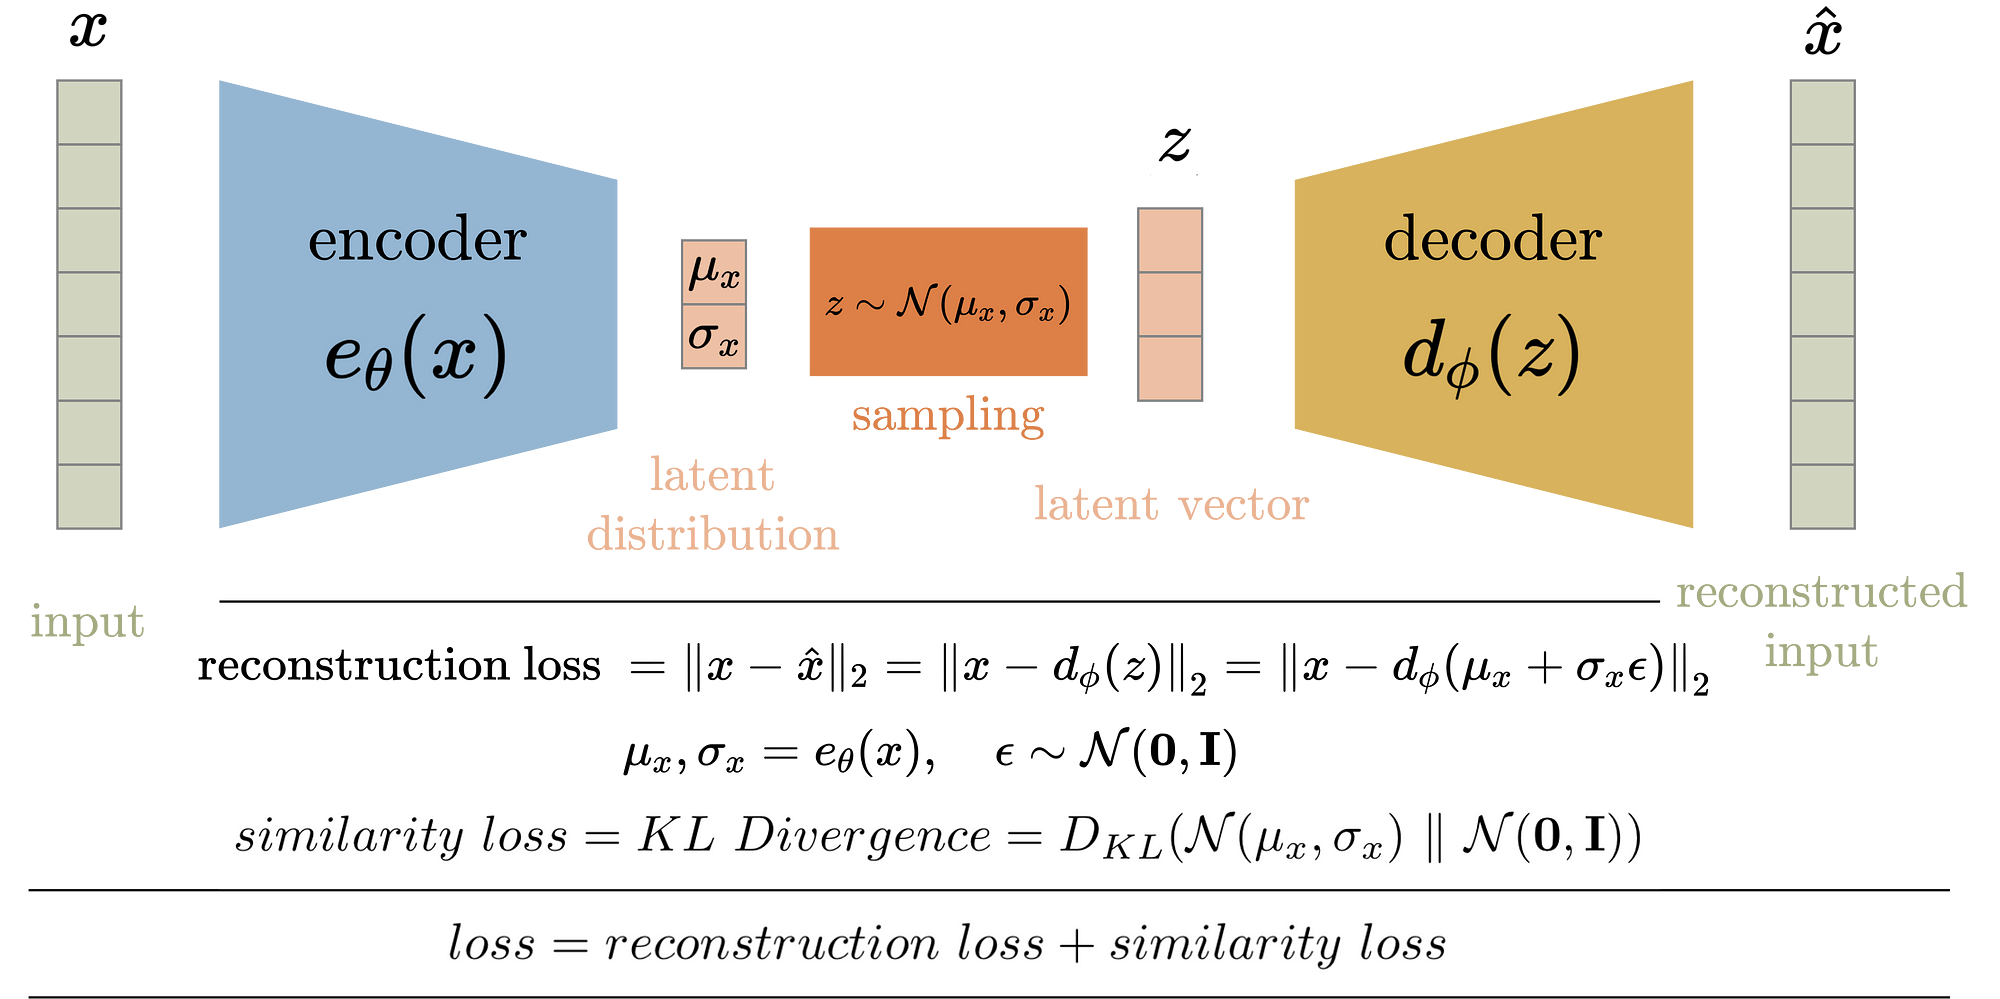

**<h2>Introduction to Probabilistic Modeling with VAEs</h2>**

  Variational Autoencoders (VAEs) are probabilistic models that learn a latent variable model for the data. Unlike traditional autoencoders, VAEs model the latent space as a probability distribution rather than a deterministic code. This allows for sampling and generation of new data points.

  Let's denote the input data as $ x $ and the latent variables as $ z $. The goal of a VAE is to learn the conditional distribution $ p(x | z) $ and the prior distribution $ p(z) $.

  The joint distribution is given by:

  $$ p(x, z) = p(x | z) p(z) $$

  The posterior distribution $ p(z | x) $, which is intractable to compute directly, is approximated using variational inference.

**<h2>Objective Function: Maximizing Variational Lower Bound (ELBO)</h2>**

  VAEs maximize a lower bound on the log marginal likelihood of the data, known as the Evidence Lower Bound (ELBO). The ELBO is defined as:

  $$ \text{ELBO} = \mathbb{E}_{q(z|x)}[\log p(x|z)] - \text{KL}[q(z|x) \| p(z)$$

  Where:
  - $ q(z|x) $ is the approximate posterior (encoder), which maps input $ x $ to a distribution over latent variables $ z $.
  - $ p(z) $ is the prior distribution over latent variables $ z $.
  - $ p(x|z) $ is the likelihood, which represents how likely the data $ x $ is given latent variables $ z $.
  - $ \text{KL}[q(z|x) \| p(z)] $ is the Kullback-Leibler (KL) divergence between the approximate posterior and the prior.

  Maximizing the ELBO encourages the approximate posterior $q(z|x)$ to match the true posterior $ p(z|x)$, while also maximizing the likelihood of the observed data.

**<h2>Encoder and Decoder Architecture in VAEs</h2>**

* **Encoder:** The encoder network parameterizes the approximate posterior $ q(z|x) $. It takes the input data $x$ and outputs the mean $ \mu(x) $ and variance $ \sigma(x) $ of the Gaussian distribution $ q(z|x) $.

Mathematically, the encoder computes:<br>
$$ \mu(x), \log(\sigma(x)^2) = \text{Encoder}(x) $$

Where $ \mu(x) $ and $ \sigma(x) $ are the parameters of $ q(z|x) $.



* **Sampling from the Learned Latent Space:**

After obtaining $ \mu(x) $ and $ \sigma(x) $ from the encoder, a sample $ z $ is drawn from the Gaussian distribution $ q(z|x) $:

$$ z = \mu(x) + \sigma(x) \cdot \epsilon $$

Where $ \epsilon \sim \mathcal{N}(0, I) $ is a sample from the standard normal distribution.

* **Decoder:** The decoder network takes the sampled latent variable $ z $ and reconstructs the input data $ x $. It outputs the parameters of the likelihood $ p(x|z) $, which can be modeled as a Gaussian distribution in the case of continuous data.

Mathematically, the decoder computes:
$$ \text{Decoder}(z) = p(x|z) $$




**<h2>Training Procedure and Loss Functions</h2>**

* **Training Objective:** The VAE is trained by maximizing the ELBO over the training dataset. The loss function used during training is the negative ELBO:

$$ \mathcal{L}_{\text{VAE}} = -\text{ELBO} $$

Which can be decomposed into:
$$ \mathcal{L}_{\text{VAE}} = -\mathbb{E}_{q(z|x)}[\log p(x|z)] + \text{KL}[q(z|x) \| p(z)] $$

Where:
- $ \mathbb{E}_{q(z|x)}[\log p(x|z)] $ represents the reconstruction loss, which measures how well the VAE reconstructs the input data $ x $ from the latent variable $ z $.
    - $ \text{KL}[q(z|x) \| p(z)] $ is the KL divergence penalty that encourages the approximate posterior $ q(z|x) $ to be close to the prior $ p(z) $.

* **Training Steps:**
    1. Forward pass through the encoder to compute $ \mu(x) $ and $ \sigma(x) $.
    2. Sample $z$ using the reparameterization trick.
    3. Forward pass through the decoder to reconstruct $ x $.
    4. Compute the loss $ \mathcal{L}_{\text{VAE}} $ and backpropagate gradients to update the encoder and decoder parameters.

---

Variational Autoencoders (VAEs) leverage probabilistic modeling to learn latent representations of data, enabling generation of new samples and efficient data compression. By maximizing the Evidence Lower Bound (ELBO), VAEs balance reconstruction fidelity and regularization, offering a powerful framework for unsupervised learning tasks requiring generative models and dimensionality reduction.

# **Dimensionality reduction and feature learning (machine learning course)**

See machnie learning courses

# **4. Applications**

## **Basic autoencoder**


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
# Load and preprocess data (example using MNIST digits)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder architecture
input_dim = x_train.shape[1]
encoding_dim = 32  # Size of encoded representations (compression factor)

# Encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = autoencoder.encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

In [ ]:

# Visualize reconstructed inputs and encoded representations
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **Sparse autoencoder**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [ ]:

# Load and preprocess data (example using MNIST digits)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the dimensions
input_dim = x_train.shape[1]
encoding_dim = 32  # Size of encoded representations (compression factor)

# Define the sparse autoencoder architecture
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(1e-4))(input_img)  # Adding L1 regularization

decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = autoencoder.encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

In [ ]:
# Visualize reconstructed inputs and encoded representations
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **Denoising Autoencoder**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model

In [ ]:
# Load and preprocess data (example using MNIST digits)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add Gaussian noise to the input data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip noisy images to stay within [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the denoising autoencoder architecture
input_dim = x_train.shape[1]
encoding_dim = 32  # Size of encoded representations (compression factor)

# Encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder on noisy data
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Encode and decode some noisy digits
decoded_imgs = autoencoder.predict(x_test_noisy)

In [ ]:
# Visualize noisy inputs and reconstructed outputs
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy input
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed output
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **Contractive Autoencoders**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [ ]:

# Load and preprocess data (example using MNIST digits)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the dimensions
input_dim = x_train.shape[1]
encoding_dim = 32  # Size of encoded representations (compression factor)

# Define the contractive autoencoder architecture
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Define the contractive loss function
def contractive_loss(y_true, y_pred):
    # Reconstruction loss
    reconstruction_loss = K.mean(K.square(y_true - y_pred), axis=-1)

    # Compute the Jacobian of the encoder's output w.r.t. input
    def jacobian(encoder_output, input_img):
        flattened_output = K.batch_flatten(encoder_output)
        gradients = K.gradients(flattened_output, input_img)[0]
        return gradients

    encoder_output = encoded  # Output of the encoder
    input_image = input_img   # Input image
    gradients = jacobian(encoder_output, input_image)
    jacobian_norm = K.sqrt(K.sum(K.square(gradients), axis=1))

    # Contractive penalty
    contractive_penalty = 1e-4  # Adjust this regularization strength
    contractive_loss = K.mean(jacobian_norm ** 2)

    return reconstruction_loss + contractive_penalty * contractive_loss

# Compile the autoencoder with contractive loss
autoencoder.compile(optimizer='adam', loss=contractive_loss)

# Train the contractive autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
decoded_imgs = autoencoder.predict(x_test)


In [ ]:

# Visualize reconstructed inputs and encoded representations
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **VAEs**

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

In [ ]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator(1337)

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = ops.shape(z_mean)[0]
        dim = ops.shape(z_mean)[1]
        epsilon = keras.random.normal(shape=(batch, dim), seed=self.seed_generator)
        return z_mean + ops.exp(0.5 * z_log_var) * epsilon


In [ ]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = ops.mean(
                ops.sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2),
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var))
            kl_loss = ops.mean(ops.sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [ ]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

In [ ]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample, verbose=0)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)


In [ ]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data, verbose=0)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)


# **Conclusion**

In this chapter, we delved into the realm of autoencoders and variational autoencoders (VAEs), exploring their capabilities in unsupervised learning and generative modeling. We began with fundamental autoencoder concepts, including sparse and denoising variations, which enhance robustness and feature extraction. Moving to VAEs, we explored their probabilistic framework for learning latent representations and generating new data samples. Through practical implementations in Keras, we demonstrated how these models can compress data, reconstruct inputs, and generate new samples effectively. This chapter highlights the versatility of autoencoders and VAEs in various applications, from dimensionality reduction to generative tasks, underscoring their role in advancing unsupervised learning techniques.